In [1]:
from glob import glob

import numpy as np
import pandas as pd
import patsy
import re

import seaborn as sns

import matplotlib.pyplot as plt

% matplotlib inline

NAN = float('nan')
INPUT_PATH = "../data/2/{}_{}.csv"

div_names = ['nfc_s', 'nfc_w', 'nfc_n', 'nfc_e', 'afc_s', 'afc_w', 'afc_n']

In [2]:
seasons = "2014-2017"
RB_df = pd.read_csv(INPUT_PATH.format("RB", seasons))
WR_df = pd.read_csv(INPUT_PATH.format("WR", seasons))

* **–1**. A **perfect negative** linear relationship
* **–0.70**. A **strong negative** linear relationship
* **–0.50**. A **moderate negative** relationship
* **–0.30**. A **weak negative** linear relationship
* **0. No linear relationship**
* **+0.30**. A **weak positive** linear relationship
* **+0.50**. A **moderate positive** relationship
* **+0.70**. A **strong positive** linear relationship
* **+1**. A **perfect positive** linear relationship


In [3]:
def apply_log(df):
    df = df.loc[:,('next_fp', 'fp', 'nfc_e', 'nfc_w', 'nfc_n', 'nfc_s', 'afc_w', 'afc_n', 'afc_s')]
    df['fp'] = np.log(df['fp'])
    df['next_fp'] = np.log(df['next_fp'])
    return df

def heatmap(df, variables):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    corr = df.corr()[['fp']]
    sns.heatmap(corr.loc[variables].sort_values(by='fp', ascending=False),
                cmap="seismic", vmin=-0.1, vmax=0.1, annot=True);

    plt.subplot(1, 2, 2)
    corr = df.corr()[['next_fp']]
    sns.heatmap(corr.loc[variables].sort_values(by='next_fp', ascending=False),
                cmap="seismic", vmin=-0.1, vmax=0.1, annot=True);

# Division vs FP

## RB

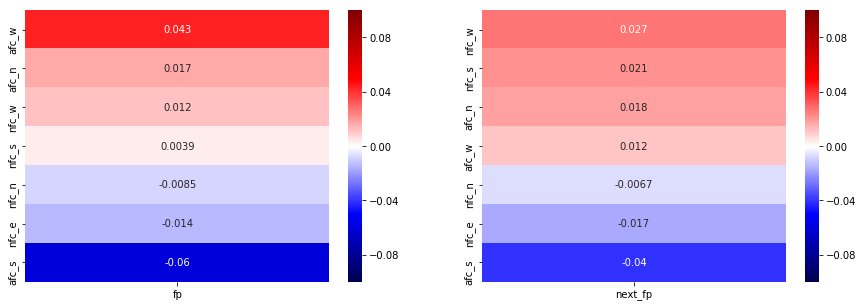

In [34]:
df = RB_df.loc[:,tuple(div_names + ['fp', 'next_fp'])]
heatmap(df, div_names)

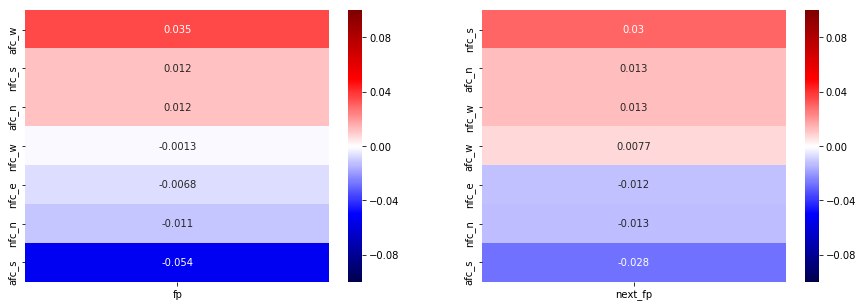

In [35]:
log_df = apply_log(df)
heatmap(log_df, div_names)

## WR

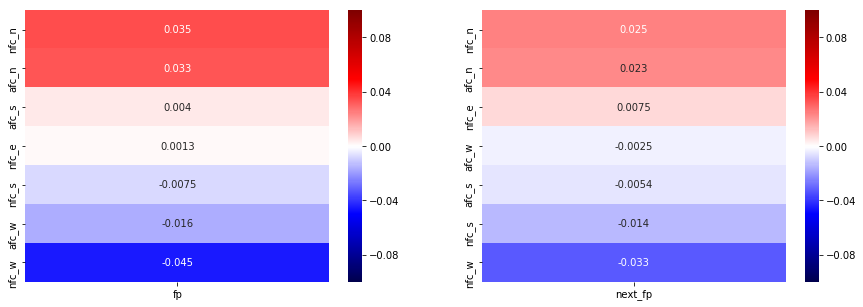

In [4]:
df = WR_df.loc[:,tuple(div_names + ['fp', 'next_fp'])]
heatmap(df, div_names)

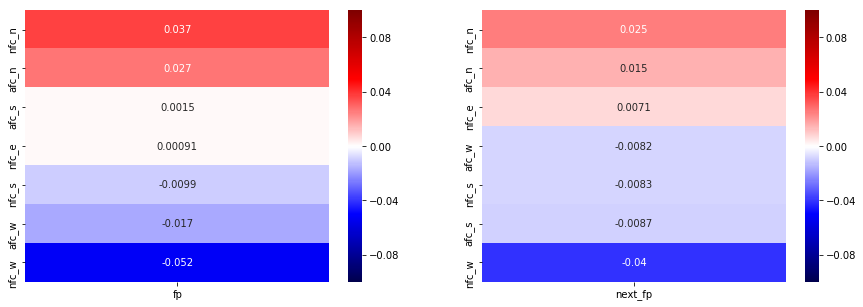

In [5]:
log_df = apply_log(df)
heatmap(log_df, div_names)

## All

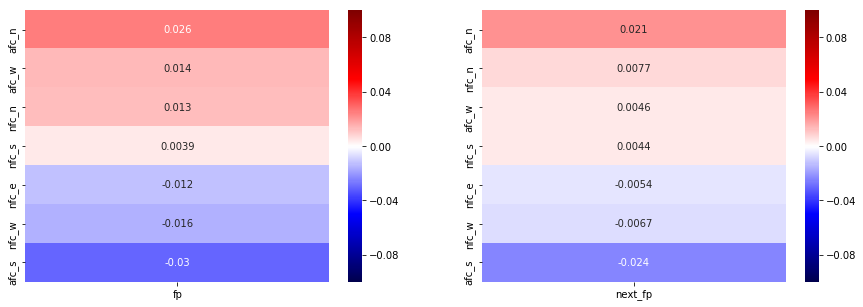

In [6]:
df = pd.concat([d.loc[:,tuple(div_names + ['fp', 'next_fp'])] for d in [RB_df, WR_df]])
heatmap(df, div_names)

Might be interesting?
* AFC S
* AFC W
* NFC W
* NFC E 

## Division vs Stats

In [8]:
perf_labels = ['rush_td', 'rush_att', 'rush_yd', 'rec_td', 'rec_target', 'rec_rec', 'rec_yd']
df = pd.concat([d.loc[:,tuple(div_names + perf_labels)] for d in [RB_df, WR_df]])

In [9]:
def print_div_corr(div_name):
    corr = df.corr()[[div_name]]
    print(corr.loc[perf_labels].sort_values(by=div_name, ascending=False))

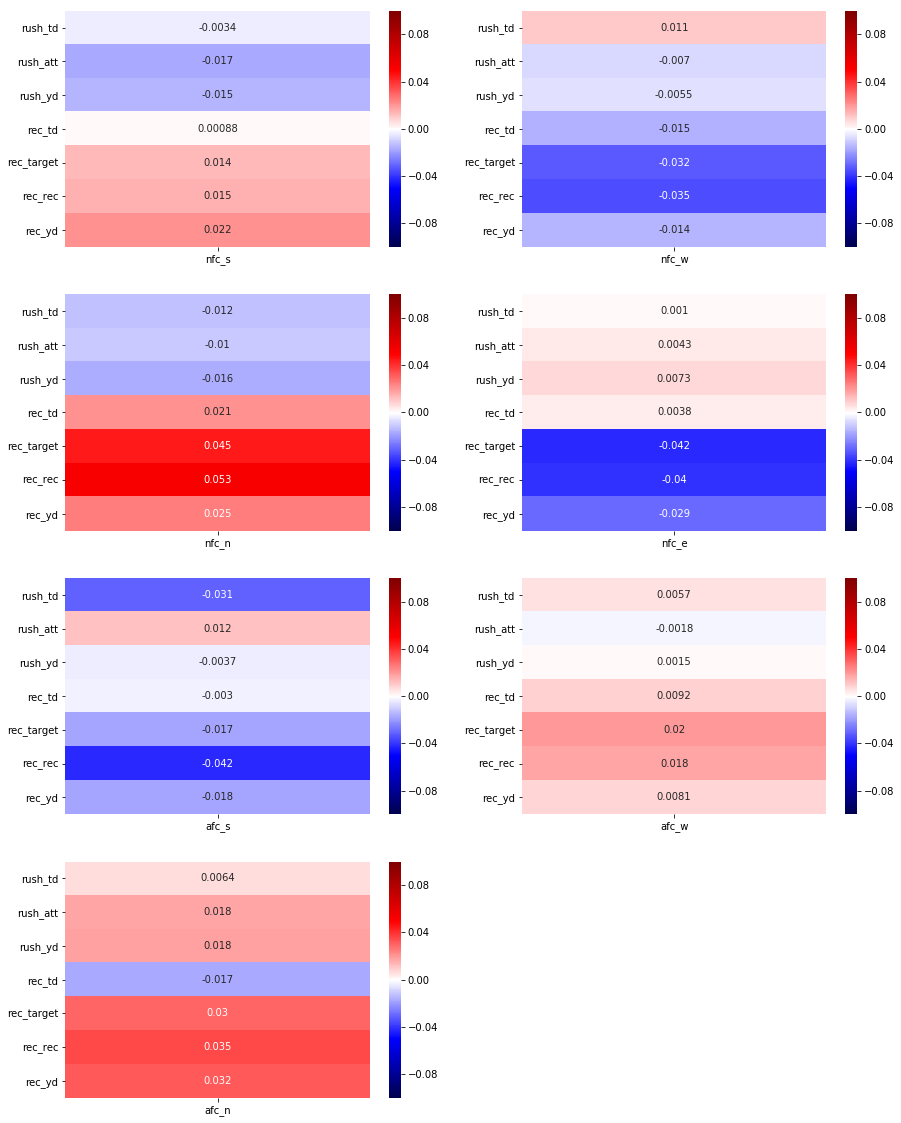

In [10]:
def plot_div_corr(div_name):
    corr = df.corr()[[div_name]]
    sns.heatmap(corr.loc[perf_labels], cmap="seismic", vmin=-0.1, vmax=0.1, annot=True);

plt.figure(figsize=(15, 20))
for div_name, i in zip(div_names, range(1, 8)):
    plt.subplot(4, 2, i)
    plot_div_corr(div_name)


Might be interesting?
* NFC W, rec_target, rec_rec
* NFC N, rec_target, rec_rec
* AFC S, rec_rec